##<center> Iterated complex factorial.  Gamma function fractals </center>##

Recently we came across a discussion on    [*Gamma Function and Fractal Factorials*](https://plus.google.com/collection/8zrhX), having as starting point this [blogpost](http://www.mathistopheles.co.uk/2015/05/14/fractal-factorials/). 

In this IPython Notebook we give the Python code to  reproduce the [Mathistopheles' results](http://www.mathistopheles.co.uk/2015/05/14/fractal-factorials/), and experiment further with this kind of fractals.

The general properties of Gamma function can be found
[here](http://www.tau.ac.il/~tsirel/dump/Static/knowino.org/wiki/Gamma_function.html).

The basic idea is to study through numerical experiments how behaves the discrete dynamical system defined by the complex function $f(z)=\Gamma(z+1)$.


 To study the dynamics of this map, one computes iterates $f^n=f\circ f \circ \cdots \circ f$, and the orbit of a point $z$ through $f$ is the sequence $(z_n)$ with  $z_n=f^n(z)$.

Since for positive integers we have $\Gamma(n+1)=n!$, one extends the factorial to a complex number $z$, $z\neq k$, with $k$ an integer, $k\leq 0$.  Namely $z!=\Gamma(z+1)=f(z)$.
The iterated factorial of $z$ is $f^n(z)$. For example $((z!)!)!=f^3(z)$.

We start with a numerical experiment illustrating dynamical behaviour of a few orbits.

In [3]:
from scipy.special import gamma
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable # we need this function to locate colorbars
%matplotlib inline

Let us  compute a segment of orbit of a point $z_0=z$, i.e. a few terms of the associated sequence $z_n=\Gamma(z_{n-1}+1)$:

In [23]:
z=1+2*1j
for k in range(25):
    z=gamma(z+1)
    print  z   

(0.112294242346326 + 0.323612885501927j)
(0.874251610757277 - 0.106907952790729j)
(0.948777931190684 - 0.0344226143472293j)
(0.978939780955043 - 0.0131190526063302j)
(0.991207960208101 - 0.00532017265947946j)
(0.996303046707114 - 0.00221084553826231j)
(0.998440602150385 - 0.000927985087495601j)
(0.999341357858007 - 0.000391146097995793j)
(0.999721652071882 - 0.000165158278610297j)
(0.999882339530896 - 6.97884699652631e-5j)
(0.999950258692482 - 2.94987085551536e-5j)
(0.999978970814976 - 1.2470383308318e-5j)
(0.999991109308073 - 5.27206671295952e-6j)
(0.999996241175832 - 2.22890861209908e-6j)
(0.999998410831796 - 9.42340744709546e-7j)
(0.999999328125252 - 3.98405671695687e-7j)
(0.999999715942002 - 1.68439456525581e-7j)
(0.99999987990475 - 7.12135242212195e-8j)
(0.999999949225613 - 3.01079554434357e-8j)
(0.999999978533385 - 1.27291706641559e-8j)
(0.999999990924252 - 5.38169373052753e-9j)
(0.999999996162916 - 2.27529576533372e-9j)
(0.999999998377741 - 9.6195940010783e-10j)
(0.9999999993141

We notice that the sequence  $z_n$ approaches 1.

In [11]:
z=3-0.2*1j
for k in range(10):
    z=gamma(z+1)
    print  z   

(5.77861687872-1.48371352226j)
(-369.648653382-156.601091536j)
(-0-0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)


In [17]:
z=2.9899809160305342-0.18574297188755021*1j
for k in range(10):
    z=gamma(z+1)
    print  z   

(5.73689190891-1.36064649141j)
(-306.495252172-227.687734931j)
(nan+nan*j)
(nan+nan*j)
(nan+nan*j)
(nan+nan*j)
(nan+nan*j)
(nan+nan*j)
(nan+nan*j)
(nan+nan*j)


Choosing randomly points in the complex plane, their orbits either approach 1 or after a number of iterations
the function `gamma` returns a `nan` (not a number), except for fixed points of the function  $f(z)=\Gamma(z+1)$, i.e. points $z$, sucha that $f(z)=z$.

$z=1$ and $z=2$ are fixed points:

Let us check if $z_0=1$ and $z_0=2$ are  attracting, repelling or neutral fixed points, i.e. if $|f'(z_0)|$ is less than 1, greater than 1 or equal to 1. For we import `mpmath` library: 

In [1]:
import mpmath as mpm  

`mpmath`  is a Python library for real and complex floating-point arithmetic with arbitrary precision.  It provides  functions to evaluate special mathematical functions such as `gamma`, `zeta`, `hurwitz`, and more.
The function of interest for gamma fractals is `mpmath.factorial(z)`.

The derivative of `mpm.factorial` at 1 is:

In [56]:

deriv = mpm.diffs(mpm.factorial, 1) # deriv is a generator 
print next(deriv)


1.0


In [59]:
deriv = mpm.diffs(mpm.factorial, 2) 
print next(deriv)

2.0


 Hence $1$ is a neutral fixed point and 2 is repelling. Since $f'(1)=1$ is a root of unity, $1$ is a rationally neutral fixed point. 
 
 *Open question*:  Does this function  exhibit  more fixed points or periodic points (points $z$  such that there exists a positive integer $q$, and  $f^q(z)=z$)?

In order to illustrate how fast the orbits are attracted by 1 or they reach a not a number, `nan`, we adapt to this case the Escape Time Algorithm used to generate
[Julia sets](http://nbviewer.ipython.org/github/empet/Math/blob/master/Julia-set.ipynb).

To each point $z_0$   one associates
an integer $n$,   which is either the first iterate  that is at a distance less than $0.005$ from $1$
or the modulus $|z_n|$  is a `nan`. If in a prescribed number of iterations, `Miter`, no one of the two conditions
is met than the `Miter` is associated to that point:

In [4]:
def iterGamma(z,Miter):
   
    for n in range(Miter):
        if  np.abs(z-1)<0.005  or np.isnan(np.abs(z)):
            return n    
        z=gamma(z+1) 
        
    return Miter    


The next Python function generates the visual representation  of  the patterns  associated to the function $f(z)=\Gamma(z+1)$, through the above  algorithm. More precisely, to a narrow grid of a rectangular region in the complex plane, one associates an array `w` of integer numbers, `n`, returned by the `iteratedGamma` function. This array is transformed into an image, mapping the n values to a colormap.  

After many experiments we decided to use the `cubehelix` colormap for most of our plots in this IPython Notebook.  The list of all colormaps provided by `matplotlib` can be found [here](http://matplotlib.org/users/colormaps.html).

In [5]:
def plotGammaiterated(re, im,  cmap, filename=False, N=100, Miter=50):
    
    # re is a tuple giving the interval on the real axis for the rectangular region
    # im is a tuple giving the interval on the imaginary axis
    # cmap is the name of the colormap used to plot the fractal set
    # filename is a string such as 'imagefile.png'
    # N is the number of points in an unit interval
    
    Nx=int((re[1]-re[0])*N)# horizontal resolution
    Ny=int((im[1]-im[0])*N)# vertical resolution
    x=np.linspace(re[0], re[1], Nx)
    y=np.linspace(im[0], im[1], Ny)
    w=np.zeros((Ny,Nx), dtype=int)

    for n in xrange(Ny):
        for m in xrange(Nx):
            z =x[m]+1j*y[n]
            w[n][m] = iterGamma(z, Miter)
    
    fig=plt.figure() 
    ax = fig.add_subplot(111) 

    im=plt.imshow(w, cmap=cmap, extent=(re[0], re[1], im[0], im[1]), interpolation='nearest', origin='lower') 
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
   
    if (filename):
        plt.savefig(filename)  

In [4]:
plt.rcParams['figure.figsize']=11,  12

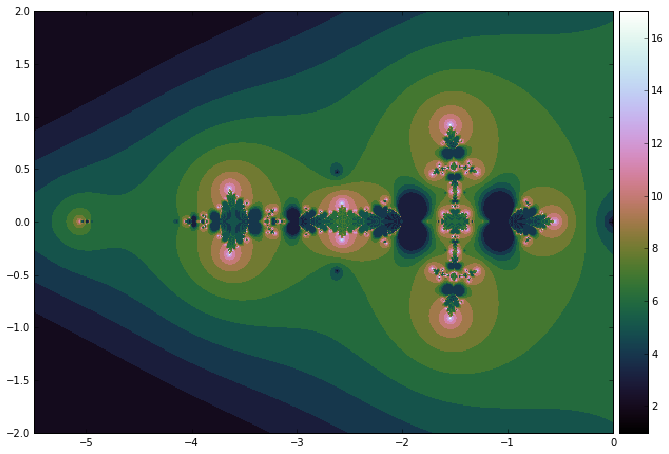

In [88]:
plotGammaiterated((-5.5, 0),(-2,2), 'cubehelix' )

Enlarging the above rectangle we get:

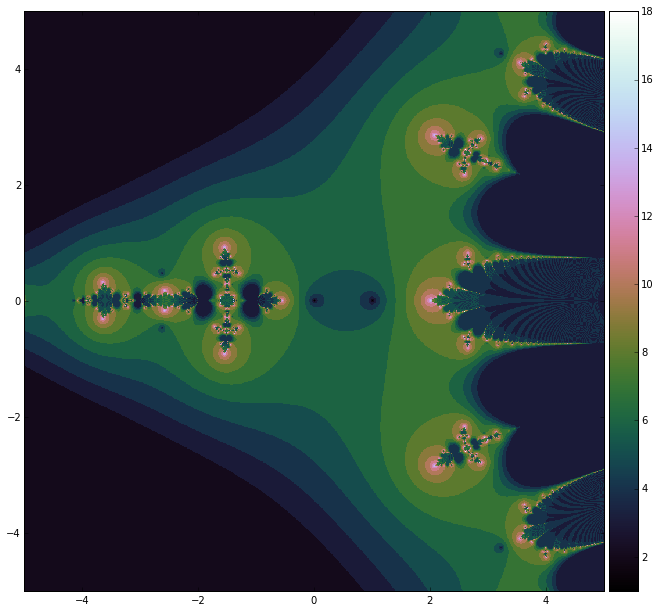

In [57]:
plotGammaiterated((-5, 5),(-5,5), 'cubehelix' )

We change the colormap:

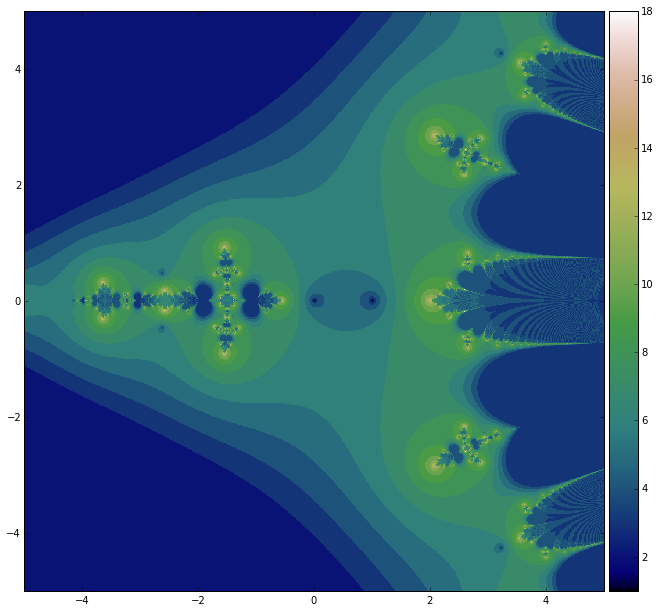

In [58]:
plotGammaiterated((-5, 5),(-5,5), 'gist_earth' )

Now let us zoom a subregion in the above plot:

In [59]:
plt.rcParams['figure.figsize']=9,9

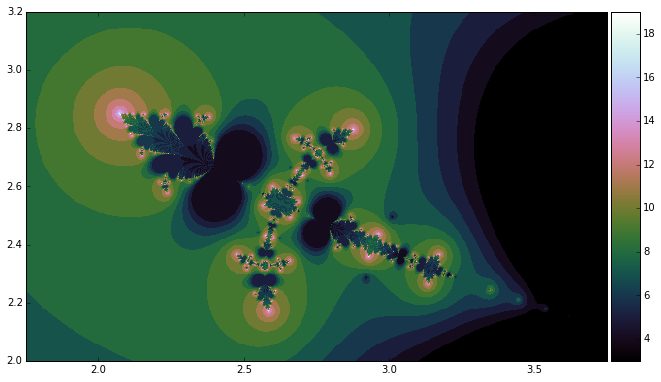

In [5]:
plotGammaiterated((1.75, 3.75),(2,3.2), 'cubehelix', N=300, filename='gammafr.png' )

In order to test the conjecture that the orbits of some points approach the fixed point 1, while other escape to  infinity or none of these conditions is met, we define a new function that returns a tuple of four elements, $(r,g,b,a)$, representing respectively the colors `yellow`, `black` and `white`.

- `yellow` encodes the  points whose orbit approaches 1
- `black` encodes the points whose iterates escape to infinity
- `white` encodes the third type of points (fixed points and possible points in other $f$-invariant sets).

In [6]:
def iterGamma3cols(z, Miter):
    
    for n in range(Miter):
        if  np.abs(z-1)<0.005:
            return   (1.0, 0.8,  0.0, 1.0)# yellow
            
        if  np.isnan(np.abs(z)):
            return (0,0,0,1) #black
        z=gamma(z+1) 
    
    return (1,1,1,1) #white

In [7]:
def plotGammaiter3cols(re, im,   N=100, Miter=50, filename=False):
    
   
    Nx=int((re[1]-re[0])*N)
    Ny=int((im[1]-im[0])*N)
    x=np.linspace(re[0], re[1], Nx)
    y=np.linspace(im[0], im[1], Ny)
    w=np.zeros((Ny, Nx, 4), dtype=float)

    for n in xrange(Ny):
        for m in xrange(Nx):
            z =x[m]+1j*y[n]
            w[n][m] = iterGamma3cols(z, Miter)
            
    fig=plt.figure() 
    ax = fig.add_subplot(111) 

    im=plt.imshow(w,  extent=(re[0], re[1], im[0], im[1]), interpolation='nearest', origin='lower') 

    if(filename):
        plt.savefig(filename)   

In [69]:
plt.rcParams['figure.figsize']=10,10

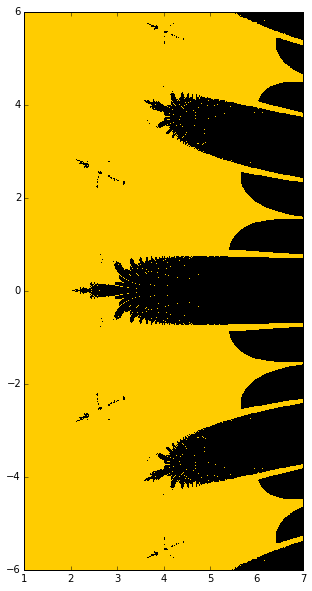

In [70]:
plotGammaiter3cols(re=(1,7), im=(-6,6))

Let us zoom the central protuberance:

In [8]:
plt.rcParams['figure.figsize']=10, 6

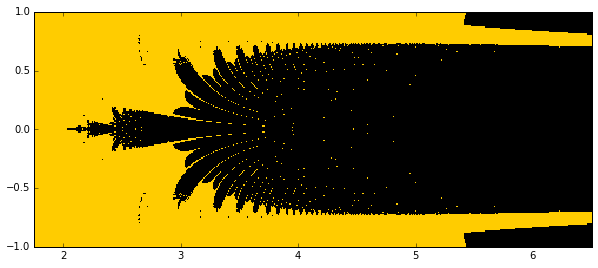

In [72]:
plotGammaiter3cols(re=(1.75,6.5), im=(-1,1))

The colored representation of this protuberance is the following:

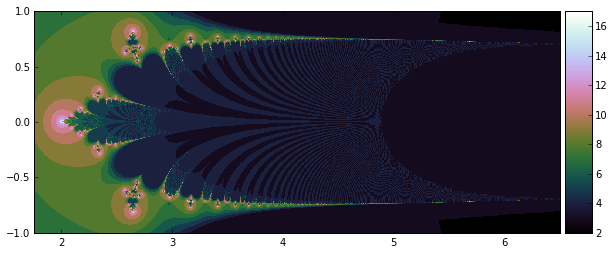

In [73]:
plotGammaiterated((1.75,6.5), (-1,1), 'cubehelix', N=300, Miter=100)

A new zoom:

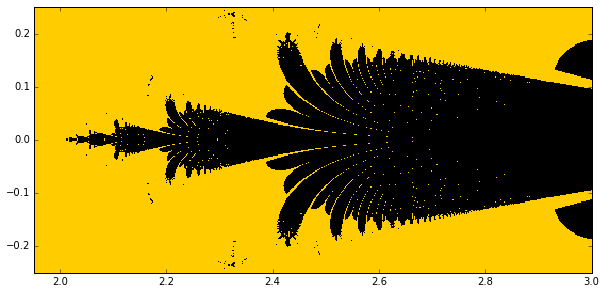

In [9]:
plotGammaiter3cols(re=(1.95,3), im=(-0.25,0.25), N=500)

and its colored version illustrates the self similarity:

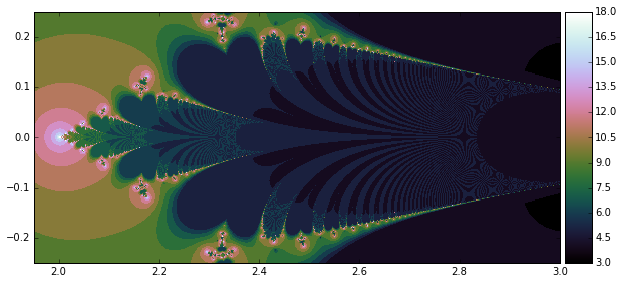

In [75]:
plotGammaiterated((1.95,3), (-0.25,0.25), 'cubehelix', N=500, Miter=100)

In [10]:
plt.rcParams['figure.figsize']=8, 8

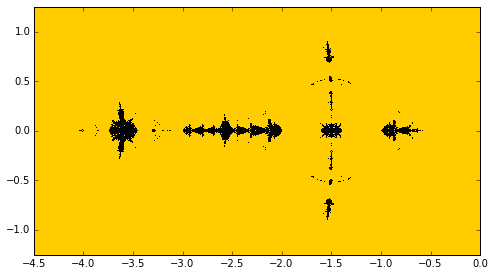

In [11]:
plotGammaiter3cols(re=(-4.5,0), im=(-1.25,1.25), N=200)

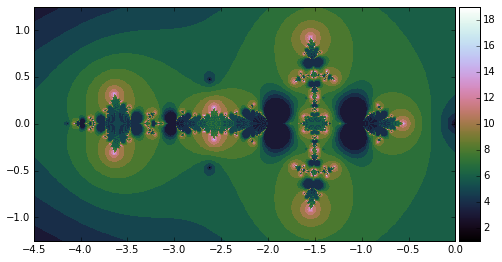

In [12]:
plotGammaiterated((-4.5,0), (-1.25,1.25), 'cubehelix', N=200, Miter=100)

To be continued :)

This IPython Notebook is included in the folder Math:
[https://github.com/empet/Math/blob/master/README.md](https://github.com/empet/Math/blob/master/README.md)

In [6]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()